<a href="https://colab.research.google.com/github/gibsonea/Biostats/blob/main/LabSolutions/Solutions15_Bootstrap_Confidence_Int_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="17intro">5.2: Bootstrap Confidence Intervals</a>

---

In our [work with bootstrap distributions](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap5/16-Bootstrap-Dist.ipynb), we explored how we can use data from one random sample that is picked from a population with unknown parameters to construct an approximation for a sampling distribution. From a bootstrap distribution, we can define a new estimator:

-   We defined the <font color="dodgerblue">bootstrap estimator, $\hat{\theta}_{\rm{boot}}$</font>, as the mean (expected) value of the bootstrap distribution.
-   We use the <font color="dodgerblue">bootstrap standard error, $\mbox{SE}_{\rm{boot}}$,</font> to estimate the variability in sample statistics.
-   In the case of estimating a population mean $\mu$ with a bootstrap estimator, we defined the <font color="dodgerblue">bootstrap estimate of bias</font> as

$${\color{dodgerblue}{\mbox{Bias}_{\rm{boot}} \big( \hat{\mu}_{\rm{boot}} \big) = \hat{\mu}_{\rm{boot}} - \bar{x}}}.$$

In this section we will bootstrap a sample proportion and a difference of two means. Then we use bootstrap distributions to account for the uncertainty that we build into our estimates using intervals.



# <a name="17nyc">Case Study: Ozone Concentration in New York City</a>

---


<figure>
<img
src="https://www-f.nescaum.org/documents/listos/AQI_Map_170518.png"
alt="Map of Air Quality in Northeastern US" width = "55%"/>
<figcaption aria-hidden="true">
Credit: <a href="https://www-f.nescaum.org/documents/listos">Northeast States for Coordinated Air Use Management (NESCAUM)</a>
</figcaption>
</figure>


According to the Unites States Environmental Protection Agency (EPA)<sup>1</sup>:

> Ozone (O3) is a highly reactive gas composed of three oxygen atoms. It is both a natural and a man-made product that occurs in the Earth's upper atmosphere (the stratosphere) and lower atmosphere (the troposphere). Depending on where it is in the atmosphere, ozone affects life on Earth in either good or bad ways.

When the ozone concentration is high, respiratory illnesses such as asthma, pneumonia, and bronchitis can become exacerbated. While the effects of short-term exposure to high ozone concentration are reversible, long-term exposure may not be reversible. The EPA sets [Ozone National Ambient Air Quality Standards (NAAQS)](https://www.epa.gov/naaqs/ozone-o3-air-quality-standards). The existing primary and secondary standards, established in 2015, are 70 parts per billion (ppb).
We will begin today's work with bootstrap distributions by investigating the following question:

> <font color="dodgerblue">Is the population of New York City experiencing long-term exposure to unhealthy levels of ozone?</font>


<br>

<font size="2">1. [Ozone pollution and your patient's health](https://www.epa.gov/ozone-pollution-and-your-patients-health/what-ozone), by the EPA accessed June 26, 2023.</font>



## <a name="17store-nyc">Loading and Summarizing NYC Ozone Data</a>

---

In the code cell below we summarize a data frame<sup>2</sup> named `environmental` from the `lattice` package and store the ozone concentration data `environmental$ozone` to a vector named `nyc.oz`.

<br>

<font size=2>2. Bruntz, Cleveland, Kleiner, and Warner (1974). "The Dependence of Ambient Ozone on Solar Radiation, Wind, Temperature, and Mixing Height". In *Symposium on Atmospheric Diffusion and Air Pollution*. American Meteorological Society, Boston.</font>

In [ ]:
library(lattice)  # loading lattice package
summary(environmental)  # numerical summary of each variable
nyc.oz <- environmental$ozone  # store ozone data to a vector

     ozone         radiation      temperature         wind       
 Min.   :  1.0   Min.   :  7.0   Min.   :57.00   Min.   : 2.300  
 1st Qu.: 18.0   1st Qu.:113.5   1st Qu.:71.00   1st Qu.: 7.400  
 Median : 31.0   Median :207.0   Median :79.00   Median : 9.700  
 Mean   : 42.1   Mean   :184.8   Mean   :77.79   Mean   : 9.939  
 3rd Qu.: 62.0   3rd Qu.:255.5   3rd Qu.:84.50   3rd Qu.:11.500  
 Max.   :168.0   Max.   :334.0   Max.   :97.00   Max.   :20.700  

## <a name="17q1">Question 1</a>

---

We will use the sample data stored in `nyc.oz` to construct a bootstrap distribution that we can use to make predictions about the ozone concentration for the population of all times in New York City. Answer the questions below to get acquainted with the sample data.

*Hint: Open the help manual in a side panel with the command `?environmental` for more details about the data.*



### <a name="17q1a">Question 1a</a>

---

How many observations are in the sample stored in `nyc.oz`? Describe the shape of the data in `nyc.oz`.

#### <a name="17sol1a">Solution to Question 1a</a>

---

<br>  

There are $n=111$ ozone concentration observations in `nyc.oz`. See the histogram and box plot below.

<br>



In [ ]:
length(nyc.oz) # count number of entries in vector

[1] 111

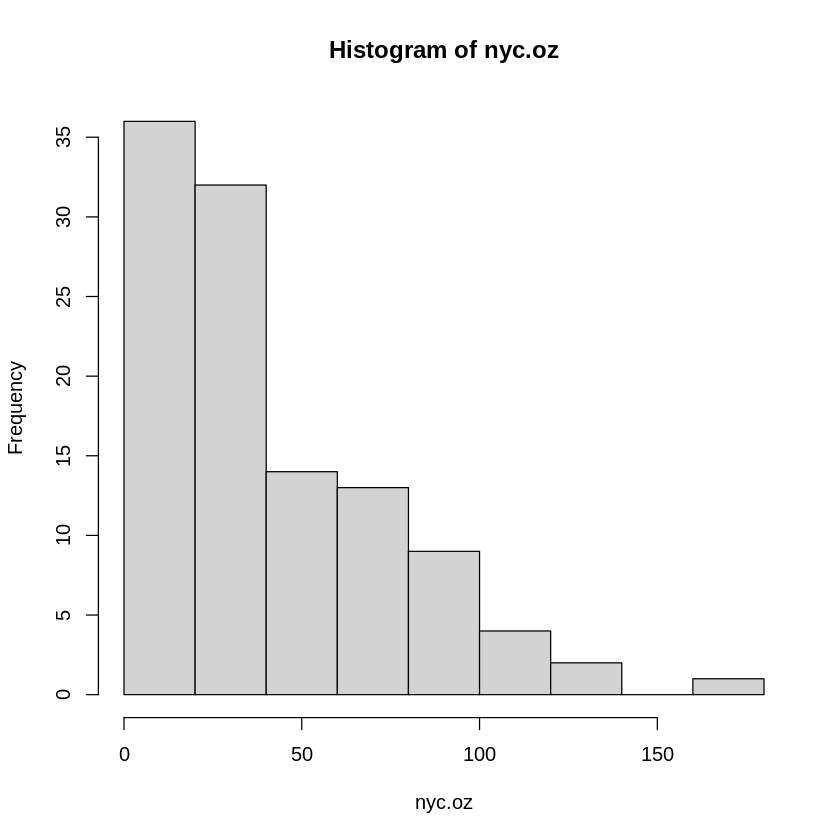

In [ ]:
# create a plot to summarize shape of data in sample
hist(nyc.oz)

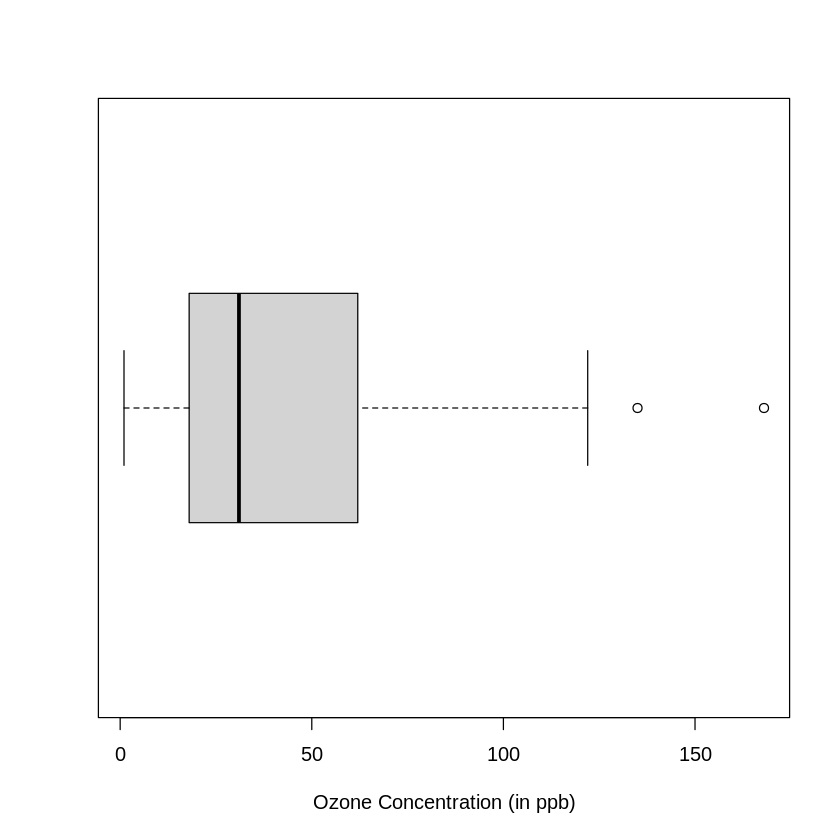

In [ ]:
boxplot(nyc.oz, horizontal = TRUE, xlab = "Ozone Concentration (in ppb)")

### <a name="17q1b">Question 1b</a>

---

Based on the sample data in `nyc.oz`, give an estimate for $\mu$, the mean ozone concentration in New York City (over all days and times).

#### <a name="17sol1b">Solution to Question 1b</a>

---

<br>  

We have studied properties of different estimators (such as median, trimmed mean, midrange) for a population mean $\mu$. The sample mean $\bar{X}$:

- Makes the practical sense.
- Is an unbiased estimator for $\mu$.
- Has the smallest variance (most precise) of all unbiased estimators.
- Has the smallest Mean Squared Error (MSE).

A good point estimate for the population mean $\mu$ is therefore $\bar{x} = 42.1$ ppb, the mean of the sample `nyc.oz`.

<br>



In [ ]:
xbar <- mean(nyc.oz)  # sample mean
xbar

[1] 42.0991

# <a name="17boot-prop">Bootstrap Distribution for a Proportion</a>

---

The sample mean for ozone concentration is below the 70 ppb limit. However, from the plot in [Question 1a](#17q1a), we see there are number of observations in the sample with an ozone concentration over 70 ppb.

In [ ]:
# count the number of observations with ozone > 70 ppb
sum(nyc.oz > 70)

[1] 24

> <font color="dodgerblue">What **proportion of all time** in NYC is
> the ozone concentration greater than 70 ppb?</font>

The sample proportion of observations with an ozone concentration greater than 70 ppb is $\hat{p} = 24/111 \approx 0.2162$.

We calculate the sample proportion in two different ways below. In both methods, we use the logical test `nyc.oz > 70` to help count the number of observations greater than 70 ppb, and then use:

1.  A `sum()` command and divide by the sample size `n`.
2.  A `mean()` command that both sums and divides by $n$.

In [ ]:
# method 1 for computing a sample proportion
n <- length(nyc.oz)  # number of observations in sample
sum(nyc.oz > 70) / n  # sample proportion over 70 ppb

[1] 0.2162162

In [ ]:
# method 2 for computing a sample proportion
mean(nyc.oz > 70)  # sample proportion over 70 ppb

[1] 0.2162162

Both methods are equivalent and we see that

$$\hat{p} = 0.2162 = 21.62 \%.$$

Using the [plug-in principle](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap5/16-Bootstrap-Dist.ipynb#16plug-in), a reasonable estimate for the proportion of all time that the ozone concentration in NYC is over 70 ppb (we denote the population proportion $p$) is

$$ p \approx \hat{p} = 0.2612.$$

**How certain can we be in this estimate?** Most likely, the sample proportion is not equal to the *exact* value of the population proportion $p$, but it should be “close”. How close should we expect the sample proportion to be to the actual value of $p$?



## <a name="17q2">Question 2</a>

---

Answer each part below to construct a bootstrap distribution for the sample proportion. Then use the result to answer the questions that follow.



### <a name="17q2a">Question 2a</a>

---

Complete the code cell below to construct a bootstrap distribution for the sample proportion of observations with ozone concentration greater than 70 ppb.

<br>

#### <font color="mediumseagreen">Hint</font>

---

<font color="mediumseagreen">*There are two operations to complete inside the for loop:*</font>

<font color="mediumseagreen">1.  *Pick a bootstrap resample from the observed sample `nyc.oz`.*</font>

<font color="mediumseagreen">2.  *Calculate the proportion of observations in the bootstrap resample with ozone concentration greater than 70 ppb.*</font>

<br>

#### <a name="17sol2a">Solution to Question 2a</a>

---

Replace all six `??` in the code cell below with appropriate code. Then run the completed code to generate a bootstrap distribution and mark the observed sample proportion (in red) and the mean of the bootstrap distribution (in blue) with vertical lines.

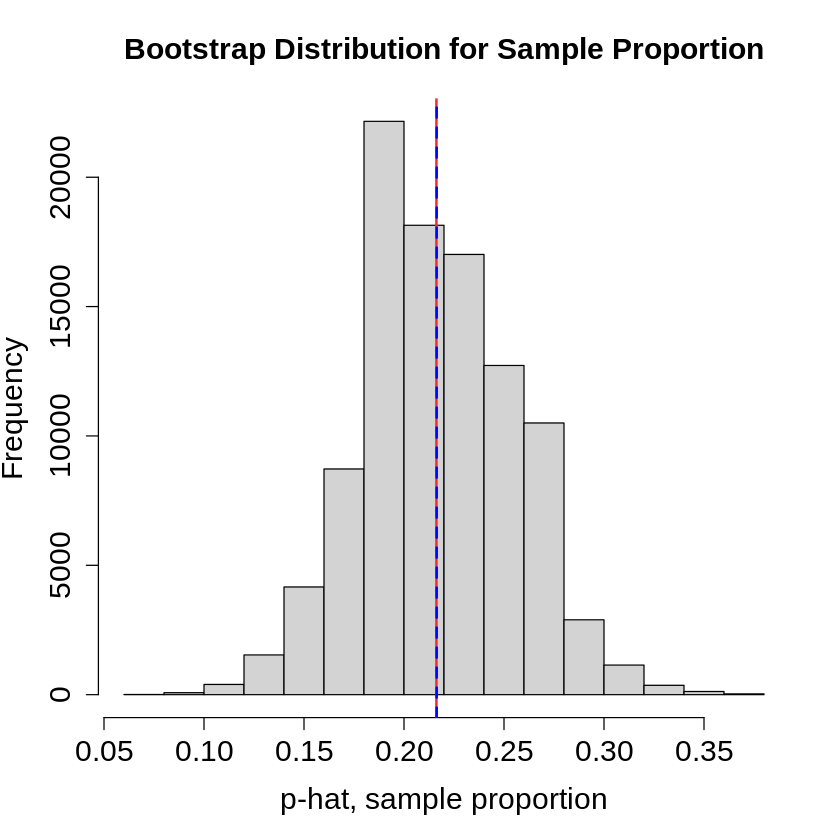

In [ ]:
set.seed(076)

N <- 10^5  # Number of bootstrap samples
boot.prop <- numeric(N)  # create vector to store bootstrap proportions

# compute and store outside of loop for more efficient code
n <- length(nyc.oz)

# for loop that creates bootstrap dist
for (i in 1:N)
{
  x <- sample(nyc.oz, size = n, replace = TRUE)  # pick a bootstrap resample
  boot.prop[i] <- mean(x > 70)  # compute bootstrap sample proportion
}

# plot bootstrap distribution
hist(boot.prop,
     breaks=20,
     xlab = "p-hat, sample proportion",
     main = "Bootstrap Distribution for Sample Proportion",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

# red line at the observed sample proportion
abline(v = mean(nyc.oz > 70), col = "firebrick2", lwd = 2, lty = 1)

# blue line at the center of bootstrap dist
abline(v = mean(boot.prop), col = "blue", lwd = 2, lty = 2)

### <a name="17q2b">Question 2b</a>

---

Based on your answer to [Question 2a](#17q2a), calculate [bootstrap estimate for bias](#17intro). *Note that answers will vary due to the randomness of bootstrapping in [Question 2a](#17q2a).*

#### <a name="17sol2b">Solution to Question 2b</a>

---

In [ ]:
# calculate bootstrap estimate of bias
samp.prop <- mean(nyc.oz > 70)
boot.prop.est <- mean(boot.prop)

boot.bias <- boot.prop.est - samp.prop

samp.prop
boot.prop.est
boot.bias

[1] 0.2162162

[1] 0.2163309

[1] 0.0001146847

<br>  

- The bootstrap estimator for $p$ is the mean of the bootstrap distribution for the proportion, $E \left( \hat{P}_{\rm{boot}} \right) =$ `mean(boot.prop)` $= 0.21633$.

- The observed sample proportion is $\hat{p} =$ `mean(nyc.oz > 70)` $= 0.21622$.

- Thus, the bootstrap estimate for bias is

$$\boxed{\mbox{Bias}_{\rm{boot}} = E \left( \hat{P}_{\rm{boot}} \right) - \hat{p} = 0.00011}.$$

<br>



### <a name="17q2c">Question 2c</a>

---

Based on your answer to [Question 2a](#17q2a), calculate the bootstrap estimate for the standard error of the sampling distribution for sample proportions. *Note that answers will vary due to the randomness of bootstrapping in [Question 2a](#17q2a).*

#### <a name="17sol2c">Solution to Question 2c</a>

---

In [ ]:
# calculate bootstrap standard error
boot.prop.se <- sd(boot.prop)
boot.prop.se

[1] 0.03899175

<br>  

We have

$$\boxed{\mbox{SE} \left( \hat{P}_{\rm{boot}} \right) = 0.03899}.$$

<br>



# <a name="17clt">Comparing Bootstrapping to CLT</a>

---

Recall the [Central Limit Theorem (CLT) for
Proportions](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap3/11-Sampling-Dist-Prop.ipynb),

$$\widehat{P} \sim N \left( \mu_{\hat{P}}, \mbox{SE}(\widehat{P}) \right) = \left( {\color{tomato}{p}}, \sqrt{\frac{{\color{tomato}{p}}(1-{\color{tomato}{p}})}{n}} \right).$$

The population proportion $p$ is unknown, but we can use the [plug-in
principle](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap5/16-Bootstrap-Dist.ipynb#16plug-in) and “plug-in” the sample
proportion ${\color{tomato}{\hat{p} = 0.2162}}$ in place of $p$ to estimate the sampling distribution for the sample proportion:

$$\begin{aligned}
\widehat{P} \sim N \left( \mu_{\hat{P}}, \mbox{SE}(\widehat{P}) \right) &= \left( {\color{tomato}{p}}, \sqrt{\frac{{\color{tomato}{p}}(1-{\color{tomato}{p}})}{n}} \right) \\
\widehat{P} & \approx N\left( {\color{tomato}{0.2162}}, \sqrt{\frac{{\color{tomato}{0.2162}}(1-{\color{tomato}{0.2162}})}{111}} \right) \\
\widehat{P} & \approx N( 0.2162, 0.0391).
\end{aligned}$$

<br>
<br>

| <font size="3">Method</font> | <font size="3">Mean of Sampling Distribution</font> | <font size="3">Standard Error</font> |
|------------------|-------------------|--------------|
| <font size="3">Bootstrap<sup>*</sup></fonr> |  <center> ${\large 0.2164}$ </center> | <center> ${\large 0.0390}$ </center> |
| <font size="3">CLT with $\hat{p}$ in place of $p$</font> | <center> ${\large 0.2162}$ </center> | <center> ${\large 0.0391}$ </center> |

<font size=2>* Bootstrap estimates from [Question 2](#17q2) will slightly vary.</font>

<br>

The two methods, bootstrap distribution and the estimate from using the CLT, give us consistent results!




# <a name="17point-int">Point and Interval Estimates</a>

---

Estimators obtained using maximum likelihood estimates (MLE), method of moments (MoM), or plug-in principle are examples of <font color="tomato">**point estimates**</font> since they result in a <font color="tomato">**single value**</font> to estimate the unknown population parameter.

-   For example, using the plug-in principle, we have a point estimate ${\color{tomato}{p \approx \hat{p} = 0.2162}}$.
-   Since there is variability from sample to sample, it is not very likely that our point estimate is perfectly accurate, but it is likely close.
-   We get a very specific estimate that is unlikely to be exactly equal to the actual parameter value.
-   <font color="tomato">**Point estimates are like trying to catch a fish with a spear.**</font>

Usually when estimating an unknown population parameter, we give an <font color="dodgerblue">**interval estimate**</font> that gives a <font color="dodgerblue">**range of plausible values**</font> for the parameter by accounting for the uncertainty due to the variability in sampling.

-   Using both the mean and standard error from the bootstrap distribution in [Question 2c](#17q2c), one possible interval estimate is $$p \approx \hat{p}_{\rm boot} \pm \mbox{SE}_{\rm boot}  = 0.216 \pm 0.039.$$
    -   <font color="dodgerblue">An interval of plausible values for $p$ is from $0.177$ to $0.255$</font>.  
-   It is more likely the actual value of the parameter is somewhere inside the interval estimate than it is to be exactly equal to a   point estimate.
-   However, interval estimates are less precise.
-   <font color="dodgerblue">**Interval estimates are like trying to catch a fish with a net.**</font>
-   We are more likely to catch a fish even if we do not know specifically where the fish is located!
-   <font color="dodgerblue">**We frequently estimate parameters with an interval to account for the variability of sample statistics.**</font>


<figure>
<img
src="https://i0.wp.com/pixahive.com/wp-content/uploads/2020/09/Man-Throwing-a-Fishing-Net-79117-pixahive.jpg?fit=778%2C518&ssl=1"
alt="Man Throwing a Fishing Net" width = "45%"/> &nbsp;&nbsp;&nbsp;
<img
src="https://cdn2.picryl.com/photo/1898/12/31/fmib-48360-indian-sealing-canoe-showing-method-of-throwing-spear-7cbd5a-1024.jpeg"
alt="Sealing Canoe Showing Method of Throwing Spear" width = "50%"/>
<figcaption aria-hidden="true">
Left Credit:  Rahil, <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">Public Domain</a>, <a href="https://pixahive.com/photo/man-throwing-a-fishing-net/">Pixahive</a> <br> Right Credit: <href="https://garystockbridge617.getarchive.net/amp/media/fmib-48360-indian-sealing-canoe-showing-method-of-throwing-spear-7cbd5a">Townsend, C. H</a>, 1898. Public Domain
</figcaption>
</figure>




# <a name="17ci-95">A 95% Bootstrap Percentile Confidence Interval</a>

---

The interval between the $2.5$ and $97.5$ percentiles (or $0.025$ and $0.975$ quantiles) of the bootstrap distribution of a statistic is a <font color="dodgerblue">**95% bootstrap percentile confidence interval**</font> for the corresponding parameter.


<center>
<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/e/e9/17fig-boot-ci.png"
alt="A 95% Bootstrap Percentile Confidence Interval" width = "75%"/>
<figcaption aria-hidden="true">
Credit: Adam Spiegler, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>
</figcaption>
</figure>
</center>

-   If most of the sample statistics are located in a certain interval of the bootstrap distribution, it seems plausible the true value of the parameter is in this interval!
-   We are 95% confident that the interval contains the actual value of the population parameter since 95% of the bootstrap resamples are inside this interval.
-   <font color="dodgerblue">**Confidence interval estimates give a range of plausible values for an unknown parameter.**</font>



## <a name="17q3">Question 3</a>

---

In [Question 2](#17q2), we created a bootstrap distribution (stored in the vector `boot.prop`) for the sample proportion of times the ozone concentration exceeds 70 ppb. One possible bootstrap distribution is plotted below. *Note that bootstrap distributions will vary slightly depending on the 100,000 bootstrap resamples that are randomly selected.*


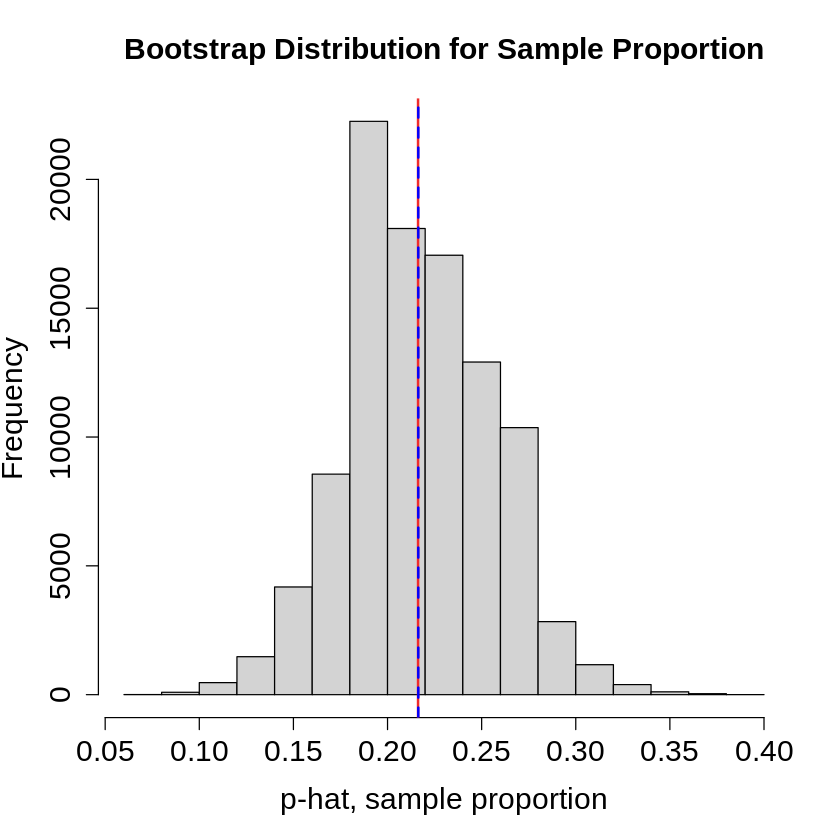

In [ ]:
##########################
# cell is ready to run
# no need for edits
##########################

set.seed(14)  # fix seed for randomization
N <- 10^5  # Number of bootstrap samples
boot.prop <- numeric(N)  # create vector to store bootstrap proportions
n <- length(nyc.oz)

# for loop that creates bootstrap dist
for (i in 1:N)
{
  x <- sample(nyc.oz, size = n, replace = TRUE)  # pick a bootstrap resample
  boot.prop[i] <- mean(x > 70)  # compute bootstrap sample proportion
}

boot.prop.est <- mean(boot.prop)
boot.prop.se <- sd(boot.prop)
samp.prop <- mean(nyc.oz > 70)

# plot bootstrap distribution
hist(boot.prop,
     breaks=20,
     xlab = "p-hat, sample proportion",
     main = "Bootstrap Distribution for Sample Proportion",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

# red line at the observed sample proportion
abline(v = samp.prop, col = "firebrick2", lwd = 2, lty = 1)

# blue line at the center of bootstrap dist
abline(v = boot.prop.est, col = "blue", lwd = 2, lty = 2)

### <a name="17q3a">Question 3a</a>

---

Using the bootstrap statistics stored in `boot.prop`, find the lower and upper cutoffs for a 95% bootstrap percentile confidence interval for the proportion of all times the ozone concentration in NYC exceeds 70 ppb.

<font color="mediumseagreen">*Hint*: Recall the `quantile()` function in R. Run the command `?quantile` for a refresher!</a>

#### <a name="17sol3a">Solution to Question 3a</a>

---

Replace all four `??` in the code cell below with appropriate code. Then run the completed code to compute lower and upper cutoffs for a 95% bootstrap percentile confidence interval.

In [ ]:
# find cutoffs for 95% bootstrap CI
lower.boot.95 <- quantile(boot.prop, probs = 0.025)  # find lower cutoff
upper.boot.95 <- quantile(boot.prop, probs = 0.975)  # find upper cutoff

# print values to screen
lower.boot.95
upper.boot.95

2.5% 
0.1441441

97.5% 
0.2972973

**Based on the output above, a 95% bootstrap percentile confidence interval is from $0.1441$ to $0.2973$.**

<br>  




### <a name="17q3b">Question 3b</a>

---

The code cell below plots a bootstrap distribution corresponding to the sample proportions stored in `boot.prop` along with two blue vertical lines to mark the lower and upper cutoffs for a 95% bootstrap percentile confidence interval. A red vertical line marks the value of the sample proportion we calculated from the original sample.

Run the code cell below to illustrate the confidence interval on the bootstrap distribution. There is nothing to edit in the code cell. Then in the space below, explain the practical meaning of the interval to a person with little to no background in statistics.

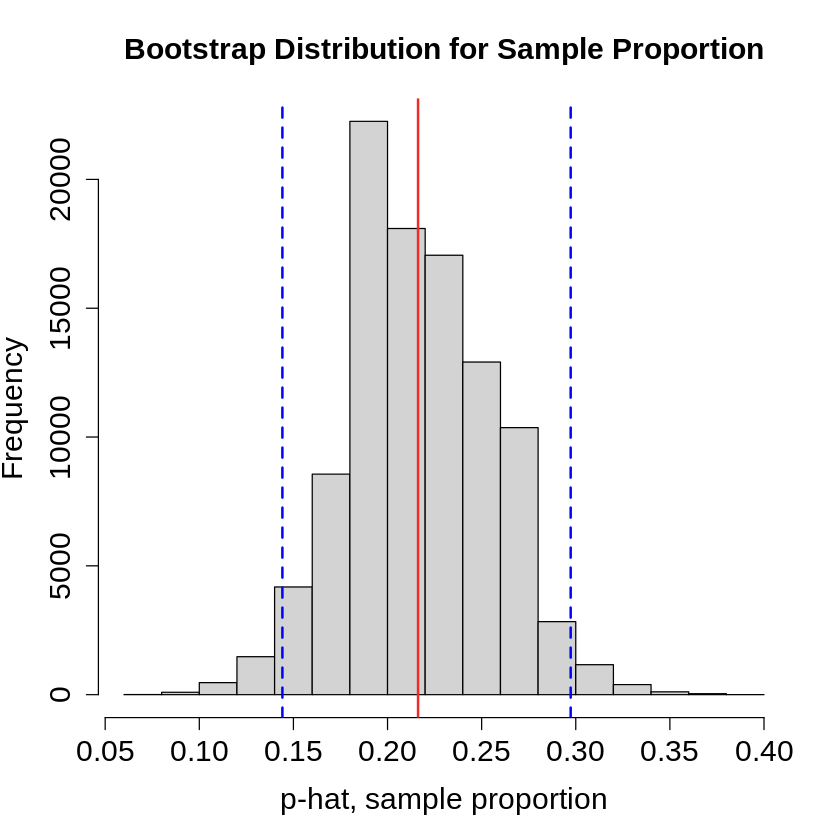

In [ ]:
#################################
# code is ready to run!
# no need to edit the code cell
#################################

# plot bootstrap distribution
hist(boot.prop,
     breaks=20,
     xlab = "p-hat, sample proportion",
     main = "Bootstrap Distribution for Sample Proportion",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

# red line at the observed sample proportion
abline(v = mean(nyc.oz > 70), col = "firebrick2", lwd = 2, lty = 1)

# blue lines marking cutoffs
lower.boot.95 <- quantile(boot.prop, probs = 0.025)  # find lower cutoff
upper.boot.95 <- quantile(boot.prop, probs = 0.975)  # find upper cutoff
abline(v = lower.boot.95, col = "blue", lwd = 2, lty = 2)
abline(v = upper.boot.95, col = "blue", lwd = 2, lty = 2)

#### <a name="17sol3b">Solution to Question 3b</a>

---

Interpret the confidence interval from [Question 3a](#17q3a).

<br>

- A plausible range of values for the percentage of all time the ozone concentration in New York City is greater than 70 ppb is from $14.41\%$ to $29.73\%$ of the time.

- We can be about 95% certain the percentage of time that the ozone concentration in New York City is greater than 70 ppb is between $14.41\%$ and $29.73\%$ of the time.

- There is a 95% chance the interval from $14.41\%$ to $29.73\%$ contains the actual percentage of time that the ozone concentration in New York City is greater than 70 ppb.

<br>



### <a name="17q3c">Question 3c</a>

---

Sometimes, it is desirable to describe the interval as some value plus or minus some margin of error:

$$\mbox{Symmetric Interval:} \qquad \mbox{point estimate} \pm \mbox{margin of error}$$

Construct a
<font color="dodgerblue">**symmetric 95% bootstrap confidence interval**</font> for the proportion of time the ozone concentration in NYC exceeds 70 ppb. Compare the symmetric confidence interval to your percentile confidence interval in [Question 3a](#17q3a).


<font color="mediumseagreen">*Hint: Recall for normal distributions, approximately 95% of the data is within 2 standard deviations of center of the distribution.*</font>

#### <a name="17sol3c">Solution to Question 3c</a>

---

Replace each `??` in the code cell below with appropriate code.

In [ ]:
samp.prop - 2 * boot.prop.se  # going 2 SE's below the observed sample proportion
samp.prop + 2 * boot.prop.se   # going 2 SE's above the observed sample proportion

[1] 0.1382153

[1] 0.2942171

**Based on the output above, a symmetric 95% bootstrap confidence
interval is from $0.1382$ to $0.2942$.**

<br>  


<br>



In [ ]:
# or we can choose to center estimate at the center of the bootstrap dist
boot.prop.est - 2 * boot.prop.se  # going 2 SE's below the mean of bootstrap dist
boot.prop.est + 2 * boot.prop.se   # going 2 SE's above the mean of bootstrap dist

[1] 0.1383425

[1] 0.2943444

**Based on the output above, another symmetric 95% bootstrap confidence
interval is from $0.1383$ to $0.2943$.**

<br>  


<br>



# <a name="17adjust-cl">Adjusting the Confidence Level</a>

---

We would expect the actual value of the unknown population parameter to equal the corresponding statistic calculated from one of the 100,000 bootstrap resamples in our distribution. Since 95% of the bootstrap statistics are inside the confidence interval:

> **There is about a 95% chance the bootstrap percentile confidence interval contains the actual value of the population paramter.**

The <font color="dodgerblue">**confidence level**</font> is the <font color="dodgerblue">**success rate**</font> of the interval estimate. We can choose different confidence levels for an interval estimate.

-   A 95% confidence level is most common.
-   Other common confidence levels are 80%, 90%, 99% and 99.9%.
-   We choose a confidence level. It is not something we calculate.
-   **What happens to an interval estimate when we change the confidence level?**



## <a name="17q4">Question 4</a>

---

In [Question 2](#17q2), we created a bootstrap distribution (stored in the vector `boot.prop`) for the sample proportion of times the ozone concentration exceeds 70 ppb. In [Question 3](#17q3), we used the bootstrap distribution to construct a 95% bootstrap percentile confidence interval. In this question, we will investigate what happens when we change the confidence level.



### <a name="17q4a">Question 4a</a>

---

Complete the first code cell below to give a 90% bootstrap percentile confidence interval to estimate the proportion of all time in NYC when the ozone concentration exceeds 70 ppb.

Then complete the second code cell to plot a histogram of the bootstrap distribution from [Question 2](#17q2) with the upper and lower 90% bootstrap confidence interval cutoffs marked with vertical lines similar to the plot in [Question 3b](#17q3b).

#### <a name="17sol4a">Solution to Question 4a</a>

---

**Based on the output below, a 90% bootstrap percentile confidence interval is from $0.1532$ to $0.2793$.**

Why do we use `probs = 0.05` and `probs = 0.95` in the code cell below? If we want to identify the middle 90% of the bootstrap statistics, the other 10% of the bootstrap statistics are split evenly between the two tails.
  - 5% is below the lower cutoff, or the area to the left is $0.05$.
  - 5% is above the upper cutoff, so the area to the left is $0.95$.

<br>  
<br>

Replace all four `??` in the code cell below with appropriate code. Then run the completed code to compute lower and upper cutoffs for a 90% bootstrap percentile confidence interval.

In [ ]:
# find cutoffs for 90% bootstrap CI
lower.prop.90 <- quantile(boot.prop, probs = 0.05)  # find lower cutoff
upper.prop.90 <- quantile(boot.prop, probs = 0.95)  # find upper cutoff

# print to screen
lower.prop.90
upper.prop.90

5% 
0.1531532

95% 
0.2792793

Nothing to edit in the code cell below. Just be sure you first run the
code cell above to calculate and store the cutoffs `lower.prop.90` and
`upper.prop.90`.

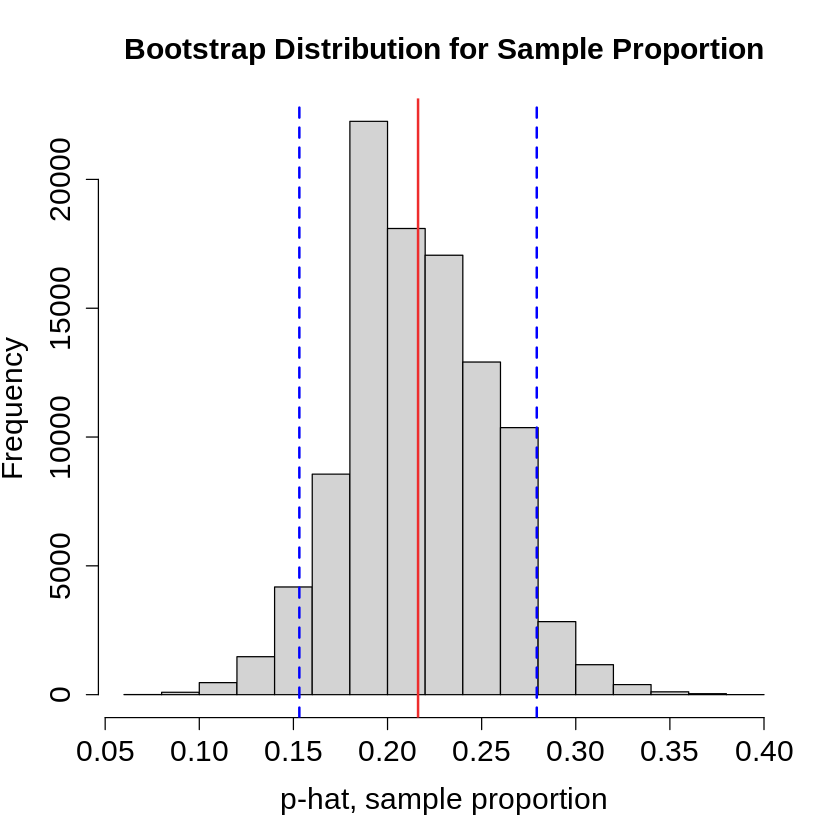

In [ ]:
##################################
# code is ready to run!
# no need to edit the code cell
##################################

# plot bootstrap distribution
hist(boot.prop,
     breaks=20,
     xlab = "p-hat, sample proportion",
     main = "Bootstrap Distribution for Sample Proportion",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

# red line at the observed sample proportion
abline(v = mean(nyc.oz > 70), col = "firebrick2", lwd = 2, lty = 1)

# blue lines marking cutoffs
abline(v = lower.prop.90, col = "blue", lwd = 2, lty = 2)
abline(v = upper.prop.90, col = "blue", lwd = 2, lty = 2)

### <a name="17q4b">Question 4b</a>

---

Complete the first code cell below to give a 99% bootstrap percentile confidence interval to estimate the proportion of all time in NYC when the ozone concentration exceeds 70 ppb.

Then complete the second code cell to plot a histogram of the bootstrap distribution from [Question 2](#17q2) with the upper and lower 99% bootstrap confidence interval cutoffs marked with vertical lines similar to the plot in [Question 3b](#17q3b).

#### <a name="17sol4b">Solution to Question 4b</a>

---

**Based on the output below, a 99% bootstrap percentile confidence interval is from $0.1171$ to $0.3243$.**

<br>  

Why do we use `probs = 0.005` and `probs = 0.995` in the code cell below? If we want to identify the middle 99% of the bootstrap statistics, the other 1% of the bootstrap statistics are split evenly between the two tails.
  - 0.5% is below the lower cutoff, or the area to the left is $0.005$.
  - 0.5% is above the upper cutoff, so the area to the left is $0.995$.

<br>  
<br>

Replace all four `??` in the code cell below with appropriate code. Then run the completed code to compute lower and upper cutoffs for a 99% bootstrap percentile confidence interval.

In [ ]:
# find cutoffs for 99% bootstrap CI
lower.prop.99 <- quantile(boot.prop, probs = 0.005)  # find lower cutoff
upper.prop.99 <- quantile(boot.prop, probs = 0.995)  # find upper cutoff

# print to screen
lower.prop.99
upper.prop.99

0.5% 
0.1171171

99.5% 
0.3243243

Nothing to edit in the code cell below. Just be sure you first run the
code cell above to calculate and store the cutoffs `lower.prop.99` and
`upper.prop.99`.

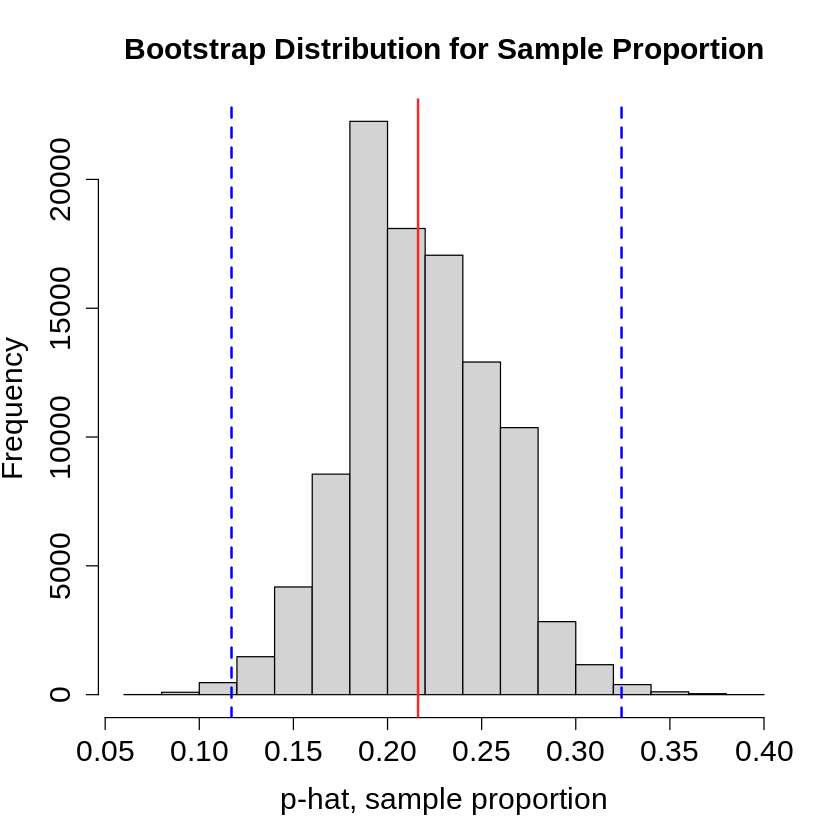

In [ ]:
##################################
# code is ready to run!
# no need to edit the code cell
##################################

# plot bootstrap distribution
hist(boot.prop,
     breaks=20,
     xlab = "p-hat, sample proportion",
     main = "Bootstrap Distribution for Sample Proportion",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

# red line at the observed sample proportion
abline(v = mean(nyc.oz > 70), col = "firebrick2", lwd = 2, lty = 1)

# blue lines marking cutoffs
abline(v = lower.prop.99, col = "blue", lwd = 2, lty = 2)
abline(v = upper.prop.99, col = "blue", lwd = 2, lty = 2)

### <a name="17q4c">Question 4c</a>

---

When we decreased the confidence level from 95% in [Question 3a](#17q3a) to 90% in [Question 4a](#17q4a), did the interval estimate get wider or more narrow? Explain why this makes practical sense. Feel free to explain using the [fishing analogy](#17point-int) from earlier.

#### <a name="17sol4c">Solution to Question 4c</a>

---

<br>  

- If we decrease the confidence level, the resulting interval estimate becomes more narrow.
  - If we use a smaller net, we are less likely to catch a fish.

Conversely:

- If we increase the confidence level, the resulting interval estimate becomes wider.
  - If we use a wider net, we are more likely to catch a fish.

<br>



### <a name="17q4d">Question 4d</a>

---

Explain the trade-off between choosing a confidence level and the precision of the interval estimate. In particular, why choose a 95% confidence interval over an interval that has a greater chance of success, such as a 99% confidence interval?

#### <a name="17sol4d">Solution to Question 4d</a>

---

<br>  

If we choose a larger confidence level, then the resulting interval is more likely to succesfully contain the population parameter. However, since interval is wider, we end up with a less accurate estimate.

<br>

If we choose a smaller confidence level, then the resulting interval is less likely to succesfully contain the population parameter. However, since interval is more narrow, we end up with a more accurate estimate that is less likely to contain the actual value of the population parameter.



<br>



# <a name="17ind-pop">Comparing Two Independent Populations</a>

---



<figure>
<img
src="https://static01.nyt.com/images/2020/01/28/well/physed-babies/physed-babies-jumbo.jpg?quality=75&amp;auto=webp"
alt="Toddlers" width = "50%"/>
<figcaption aria-hidden="true">
Credit: iStock</a>
</figcaption>
</figure>


Thus far, we have been bootstrapping from a sample that has just one variable of interest. For example, in `nyc.oz` we have $n=111$ observed ozone concentrations in NYC. For each observation in our sample, we have one variable of interest, namely the ozone concentration (in ppb). In statistics, we are often interested in determining whether there is an association between two or more different variables. For example, we can ask:

> Does smoking during pregnancy have an affect on the weight of the baby at birth?

To answer this question, we can collect data from a random sample of newborn babies. However, we need to collect more than one variable for each newborn in our sample to answer the question above.



## <a name="17q5">Question 5</a>

---

Explain how you could design a study to collect data that could help determine whether smoking during pregnancy has an affect on the weight of the baby at birth.

### <a name="17sol5">Solution to Question 5</a>

---

<br>  

Answers will vary, and certainly there are moral, ethic, and logistical hurdles that might make such a study impossible or unethical.

<br>



# <a name="17smoke-wt">Case Study: Smoking and Birth Weights</a>

---

To help explore this question, we will use the sample in the data frame<sup>3</sup> `birthwt` that is in the package `MASS`. In the code cell below, the `MASS` package is loaded and numerical summaries for all variables in `birthwt` are computed and displayed.

<br>

<font size=2>3. Baystate Medical Center, Springfield, Massachusetts.</font>

## <a name="17load-wt">Loading the Birth Weight Sample</a>

---


In [ ]:
library(MASS)  # load MASS package
summary(birthwt)  # summary of data frame

      low              age             lwt             race      
 Min.   :0.0000   Min.   :14.00   Min.   : 80.0   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:19.00   1st Qu.:110.0   1st Qu.:1.000  
 Median :0.0000   Median :23.00   Median :121.0   Median :1.000  
 Mean   :0.3122   Mean   :23.24   Mean   :129.8   Mean   :1.847  
 3rd Qu.:1.0000   3rd Qu.:26.00   3rd Qu.:140.0   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :45.00   Max.   :250.0   Max.   :3.000  
     smoke             ptl               ht                ui        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.0000  
 Mean   :0.3915   Mean   :0.1958   Mean   :0.06349   Mean   :0.1481  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :3.0000   Max.   :1.00000   Max.   :1.0000  
      ftv              bwt      
 Min.   :0.0000

## <a name="17q6">Question 6</a>

---

How many observations are in the data set? How many variables? Which variables are categorical and which are quantitative? Which variables are most important in helping determine whether smoking during pregnancy has an affect on the weight of the baby at birth?

### <a name="17sol6">Solution to Question 6</a>

---

<br>  

The command `nrow(birthwt)` counts the number of rows (observations) in the data frame `birthwt`. From the output below, we see there are $n=189$ total observations in sample.

<br>

There 10 variables, all of which are being stored as quantitative variables at first. However, after looking at the help manual for `birthwt`, the following variables should actually be converted to categorical factors:

- `low`
- `race`
- `smoke`
- `ht`
- `ui`

The most useful variables to focus our attention would be `smoke`, `low`, and `bwt`.

<br>



In [ ]:
?birthwt

In [ ]:
nrow(birthwt)

[1] 189

## <a name="17clean-wt">Cleaning the Birth Weight Data</a>

---

The variable `smoke` is being stored as a quantitative variable.

-   Pregnant parents that did not smoke have a `smoke` value equal to `0`.
-   Pregnant parents that were smokers have a `smoke` value equal to `1`.
-   Run the code cell below to make these categories more clearly labeled.
    -   Non-smokers are assigned the character string `"no"`.
    -   Smokers are assigned the character string `"smoker"`.
    -   We use the `factor()` command to convert the `smoke` variable to   a categorical variable.
    -   The output tells us out of 189 parents, 115 self-identified as       non-smokers and 74 as smokers.

In [ ]:
birthwt$smoke[birthwt$smoke == 0]  <- "no"
birthwt$smoke[birthwt$smoke == 1]  <- "smoker"
birthwt$smoke <- factor(birthwt$smoke)
summary(birthwt$smoke)

no smoker 
   115     74

## <a name="17q7">Question 7</a>

---

Complete the code cell below to create a side-by-side box plots to compare the distribution of weights for smokers and non-smokers.

#### <a name="17sol7">Solution to Question 7</a>

---

Replace each `??` in the code cell below to generate side-by-side box plots for comparison.

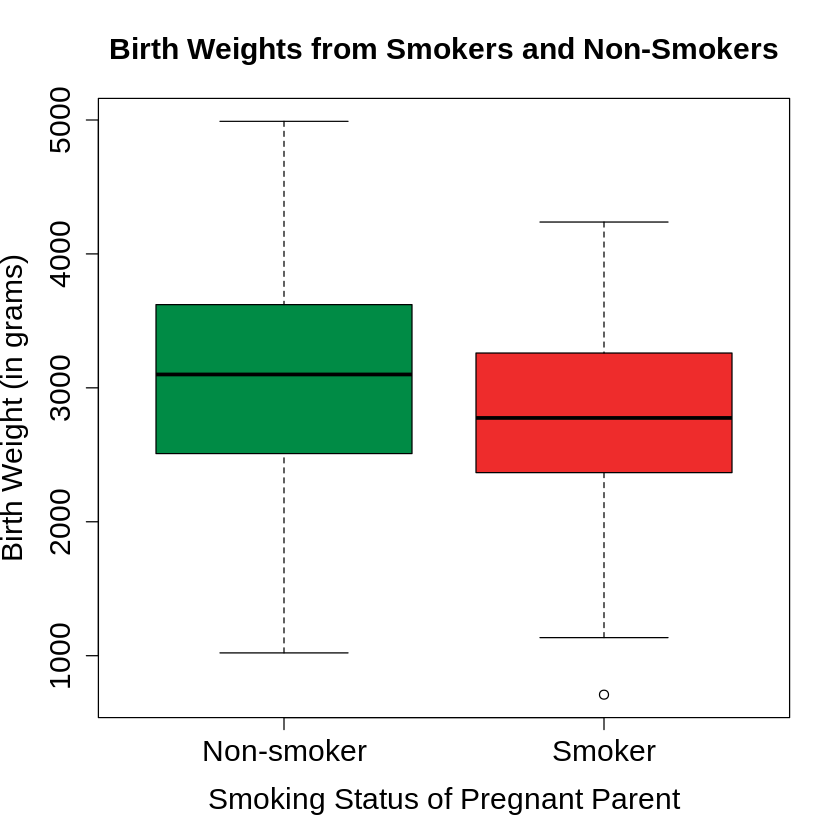

In [ ]:
# create side by side box plots
plot(bwt ~ smoke, data = birthwt,
     col = c("springgreen4", "firebrick2"),
     main = "Birth Weights from Smokers and Non-Smokers",
     xlab = "Smoking Status of Pregnant Parent",
     ylab = "Birth Weight (in grams)",
     names = c("Non-smoker", "Smoker"),
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

<br>  
<br>



## <a name="17-diff-means">Difference in Two Independent Means</a>

---

Our statistical question is:

> Does smoking during pregnancy have an affect on the weight of the baby at birth?

In this example, we have two independent populations of parents to
consider.

-   All pregnant parents that did not smoke during pregnancy.
-   All pregnant parents that smoked during pregnancy.
-   A pregnant person is either in one group or the other, but not both.

Ideally, if we had access to data on every baby that has ever been born, then we could:

-   Calculate $\mu_{\rm{non}}$, the mean birth weight of *all* children   of non-smokers.
-   Calculate $\mu_{\rm{smoker}}$, the mean birth weight of *all*   children of smokers.
-   Consider how large is the difference in the two means,   $\mu_{\rm{non}} - \mu_{\rm{smoker}}$.
    -   If the difference in populations means is 0, there is no       difference in mean birth weights.
    -   If the difference is not 0, then there is a difference in mean       birth weights.

Although we have data from a random sample rather than the entire
population, we can perform equivalent analysis comparing two sample
means:

-   Calculate $\bar{x}_{\rm{non}}$, the *sample* mean birth weight of   children of non-smokers in the sample.
-   Calculate $\bar{x}_{\rm{smoker}}$, the *sample* mean birth weight of   children of smokers in the sample.
-   Consider how large is the difference in the two means,   $\bar{x}_{\rm{non}} - \bar{x}_{\rm{smoker}}$.
    -   If the difference is *close to zero*, there is likely no       difference in the population means.
    -   If the difference is *not close to zero*, there likely is a       difference in the population means.
    -   How can we determine what we mean by “close to zero”?



## <a name="17subset">Subsetting Into Two Independent Samples</a>

---

At the moment, we have all of the sample data for smokers and non-smokers stored in the same data frame named `birthwt`. How can we calculate the sample mean birth weights for the non-smoking group separate from the smoking group? One way to compare the two samples is to split the sample into two independent subsets based on whether or not the child was birthed by a smoker or not.



## <a name="17q8">Question 8</a>

---

Answer the questions to find an initial point estimate for the difference in the mean birth weights of all children born to a non-smoking parent compared to the mean birth weight of all children born to a parent that did smoke while pregnant.



### <a name="17q8a">Question 8a</a>

---

Complete each of the `subset()` commands below to subset the data into two independent samples: parent was a smoker and parent was a non-smoker.

#### <a name="17sol8a">Solution to Question 8a</a>

---

In [ ]:
# subset the sample into two independent samples
non <- subset(birthwt, smoke == "no")
smoker <- subset(birthwt, smoke == "smoker")

<br>  
<br>



### <a name="17q8b">Question 8b</a>

---

Complete the code cell below to calculate, store, and print the difference in sample means based on the data in our original sample.

#### <a name="17sol8b">Solution to Question 8b</a>

---

In [ ]:
# calculate difference in sample means
obs.diff <- mean(non$bwt) - mean(smoker$bwt)
obs.diff  # print observed difference to screen

[1] 283.7767

In [ ]:
tapply(birthwt$bwt, birthwt$smoke, mean)

no   smoker 
3055.696 2771.919

In [ ]:
3055.696 - 2771.919


[1] 283.777

<br>
We have

$$\bar{x}_{\rm{non}} - \bar{x}_{\rm{smoker}} = 3055.696 - 2771.919 = 283.777 \mbox{ grams}.$$

Newborns birth by a non-smoking parent are on average $283.777$ grams heavier than newborns birthed by a parent that did smoke while pregnant.



<br>



### <a name="17q8c">Question 8c</a>

---

Based on your answer to [Question 8b](#17q8b), given a **point estimate** for the difference in the mean birth weights of all children born to a non-smoking parent compared to the mean birth weight of all children born to a parent that did smoke while pregnant. *Include units in your answer.*


#### <a name="17sol8c">Solution to Question 8c</a>

---

<br>  
We use the difference in sample means as a starting point for our estimate for the difference in population means:

$$\boxed{\mu_{\rm{non}} - \mu_{\rm{smoker}} \approx \bar{x}_{\rm{non}} - \bar{x}_{\rm{smoker}} =  283.777 \mbox{ grams} }.$$
<br>



### <a name="17q8d">Question 8d</a>

---

Based on your estimate in [Question 8c](#17q8c), do you believe there is a difference in the mean birth weight of all babies whose parent smoked while pregnant compared to the mean birth weight of all babies whose parent did not smoke while pregnant?

#### <a name="17sol8d">Solution to Question 8d</a>

---

<br>  

On average, it does seem like newborns birth by non-smokers weigh more than newborns birthed by smokers. However, perhaps the difference of approxiately $284$ grams is due to randomness in sampling. Had we chosen a different sample of pregnant parents, the corresponding difference in sample mean birth weights would be different. **Is the observed sample difference of 284 grams beyond the margin of error?**

<br>



## <a name="17uncertain">Accounting for Uncertainty in Sampling</a>

---

In the case of comparing samples, we need to be mindful of the randomness involved in the sampling process. If we pick another sample of 189 babies and compare the difference in sample means, we will likely get a different estimate for the difference in mean birth weights. **How can we determine whether or not the point estimate in [Question 8c](#17q8c) is “close enough to zero”?**

The code cell is included below to ensure data frames `non` and `smoker` are defined so the code that follows runs. You may not need to run the code cell below if you already defined data frames `non` and `smoker` when answering [Question 8a](#17q8a).



In [ ]:
# this was asked in question 8q
# need to define these samples for
# code cells that follow
non <- subset(birthwt, smoke == "no")
smoker <- subset(birthwt, smoke == "smoker")

# <a name="17boot-two">Bootstrapping Two Independent Samples</a>

---

Given independent samples of sizes $m$ and $n$ from two independent populations:

1.  Draw a bootstrap resample of size $m$ *with replacement* from the first sample.

In [ ]:
m.non <- length(non$bwt)  # m, size of sample 1
temp.non <- sample(non$bwt, size = m.non, replace = TRUE)

2.  Draw a bootstrap resample of size $n$ *with replacement* from the second sample.

In [ ]:
n.smoker <- length(smoker$bwt)  # n, size of sample 2
temp.smoker <- sample(smoker$bwt, size = n.smoker, replace = TRUE)

3.  Compute a statistic that compares the two groups such as a difference or ratio of two statistics (means, proportions, variances, etc.).

In [ ]:
diff.resample <- mean(temp.non) - mean(temp.smoker)
diff.resample

[1] 209.3382

4.  Repeat this process many (100,000) times.
5.  Construct a bootstrap distribution of the comparison statistics from each resample.



## <a name="17q9">Question 9</a>

---

Follow the steps below to generate a bootstrap distribution for the difference in sample mean birth weights for babies born to non-smokers compared to babies born to smokers. Then use the bootstrap distribution to obtain a 95% bootstrap percentile confidence interval for the corresponding difference in population means.



### <a name="17q9a">Question 9a</a>

---

Complete the code cell below to construct a bootstrap distribution for the difference in the sample mean birth weights of of babies born to non-smokers compared to smokers.

#### <a name="17sol9a">Solution to Question 9a</a>

---

Replace all nine `??` in the code cell below with appropriate code. Then run the completed code to generate a bootstrap distribution and mark the observed difference in sample means (in red) and the mean of the bootstrap distribution (in blue) with vertical lines.

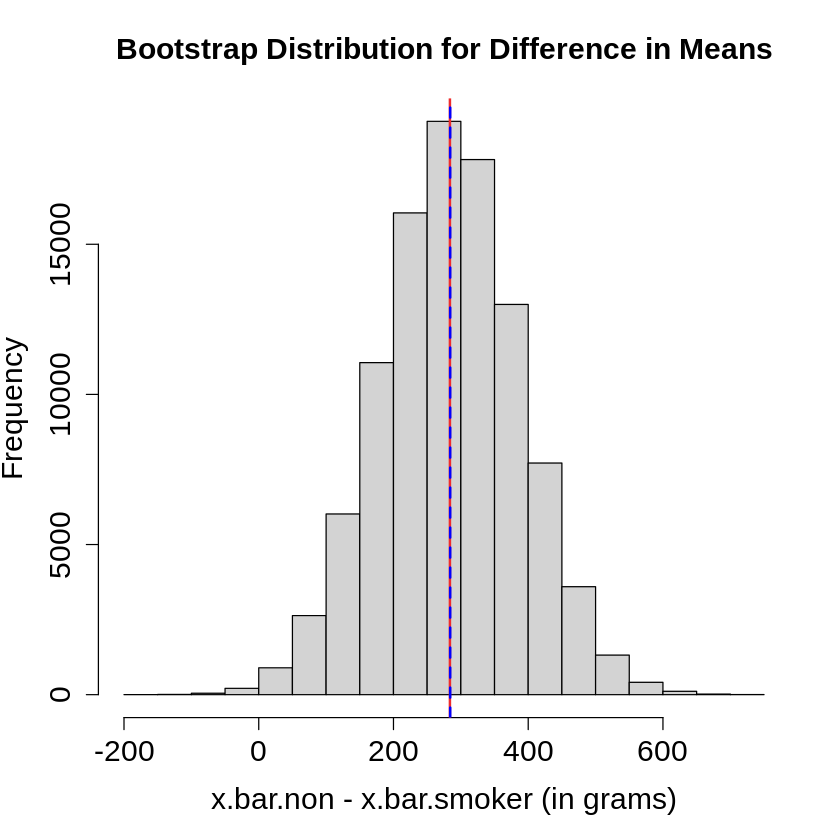

In [ ]:
set.seed(076)

N <- 10^5  # Number of bootstrap samples
boot.diff.mean <- numeric(N)  # create vector to store bootstrap proportions

# for loop that creates bootstrap dist
for (i in 1:N)
{
  x.non <- sample(non$bwt, size = m.non, replace = TRUE)  # pick a bootstrap resample
  x.smoker <- sample(smoker$bwt, size = n.smoker, replace = TRUE)  # pick a bootstrap resample
  boot.diff.mean[i] <- mean(x.non) - mean(x.smoker)  # compute difference in sample means
}

# plot bootstrap distribution
hist(boot.diff.mean,
     breaks=20,
     xlab = "x.bar.non - x.bar.smoker (in grams)",
     main = "Bootstrap Distribution for Difference in Means",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

# red line at the observed  difference in sample means
abline(v = mean(non$bwt) - mean(smoker$bwt), col = "firebrick2", lwd = 2, lty = 1)

# blue line at the center of bootstrap dist
abline(v = mean(boot.diff.mean), col = "blue", lwd = 2, lty = 2)

### <a name="17q9b">Question 9b</a>

---

Complete the code cell below to give a 95% bootstrap percentile confidence interval to estimate the difference in the mean birth weight of all babies born to non-smokers compared the to mean birth of all babies born to smokers. *Include units in your answer.*

#### <a name="17sol9b">Solution to Question 9b</a>

---

**Based on the output below, a 95% bootstrap percentile confidence interval is from $81.0530$ grams to $487.5373$ grams.**

<br>  
<br>

In [ ]:
# find cutoffs for 95% bootstrap CI
lower.bwt.95 <- quantile(boot.diff.mean, probs = 0.025)  # find lower cutoff
upper.bwt.95 <- quantile(boot.diff.mean, probs = 0.975)  # find upper cutoff

# print to screen
lower.bwt.95
upper.bwt.95

2.5% 
81.05304

97.5% 
487.5373

### <a name="17q9c">Question 9c</a>

---

Interpret the practical meaning of your interval estimate in [Question 9b](#17q9b). Do you think it is plausible to conclude smoking does have an effect on the weight of a newborn? Explain why or why not.

#### <a name="17sol9c">Solution to Question 9c</a>

---

<br>  

- There is a 95% chance the interval from $81.0530$ grams to $487.5373$ grams contains the actual difference in mean birth weights of newborns birthed by non-smoking and smoking parents.

- Since the only plausible values for the difference in the two means are all positive, we can conclude smoking during pregnancy does have an effect on birth weight of a newborn.


<br>


# <a name="17CC License">Creative Commons License Information</a>
---

![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

*Statistical Methods: Exploring the Uncertain* by [Adam
Spiegler (University of Colorado Denver)](https://github.com/CU-Denver-MathStats-OER/Statistical-Theory)
is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/). This work is funded by an [Institutional OER Grant from the Colorado Department of Higher Education (CDHE)](https://cdhe.colorado.gov/educators/administration/institutional-groups/open-educational-resources-in-colorado).

For similar interactive OER materials in other courses funded by this project in the Department of Mathematical and Statistical Sciences at the University of Colorado Denver, visit <https://github.com/CU-Denver-MathStats-OER>.